# Instructions
The following Cells need to be executed.

They are used to download and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day. 

I put all this here instead of providing you the dataset directly, so that you could learn something along the way :) 

The assignment is in the last cell.

### And here we read in the data

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

bikes = pd.read_csv('2016-Q1-cabi-trip-history-data.csv')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)

bikes.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,start,end
0,166,2016-01-01 00:06:58,2016-01-01 00:09:44,31102,11th & Kenyon St NW,31105,14th & Harvard St NW,W01346,Member,2016-01-01 00:06:58,2016-01-01 00:09:44
1,448,2016-01-01 00:10:20,2016-01-01 00:17:48,32039,Old Georgetown Rd & Southwick St,32002,Bethesda Ave & Arlington Rd,W22202,Member,2016-01-01 00:10:20,2016-01-01 00:17:48
2,715,2016-01-01 00:13:52,2016-01-01 00:25:48,31222,New York Ave & 15th St NW,31214,17th & Corcoran St NW,W21427,Member,2016-01-01 00:13:52,2016-01-01 00:25:48
3,213,2016-01-01 00:15:29,2016-01-01 00:19:03,31506,1st & Rhode Island Ave NW,31509,New Jersey Ave & R St NW,W01294,Member,2016-01-01 00:15:29,2016-01-01 00:19:03
4,872,2016-01-01 00:16:16,2016-01-01 00:30:49,31041,Prince St & Union St,31048,King St Metro South,W22058,Member,2016-01-01 00:16:16,2016-01-01 00:30:49


### Create a new column that represents the hour of the day 

In [3]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))

### Aggregate to get a count per hour/minute of the day across all trips

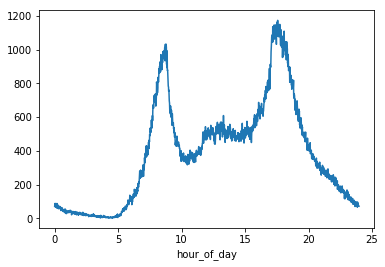

In [12]:
hours = bikes.groupby('hour_of_day').agg('count')
hours['hour'] = hours.index

hours.start.plot()

# Assignment 4
Using the **`hours`** dataframe and the `hour_of_day` column, perform the following cells. 

Explain the results in a **paragraph + charts** of  to describe which model you'd recommend


## 1. Create 3 models fit to `hour_of_day` with varying polynomial degrees 

In [13]:
from sklearn import linear_model
import numpy as np

hours_new = hours.reset_index().values

x = hours_new[:,0].reshape(-1,1)
y = hours_new[:,1]

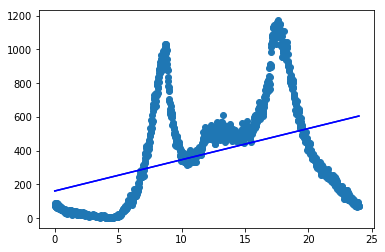

In [14]:
## Model 1 
linear = linear_model.LinearRegression()
linear.fit(x,y)
linear.coef_, linear.intercept_
plt.scatter(x, y)
plt.plot(x, x*linear.coef_ + linear.intercept_, c='b')
plt.plot(x, np.dot(x, linear.coef_) + linear.intercept_, c='b')

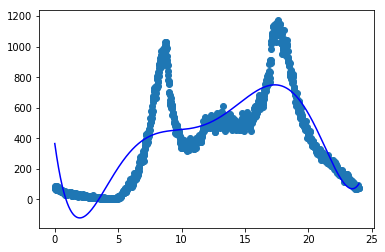

In [23]:
## Model 3
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)
x_6 = poly.fit_transform(x.reshape(-1,1))
linear = linear_model.LinearRegression()
linear.fit(x_6, y)
(linear.coef_, linear.intercept_)
plt.scatter(x,y)
plt.plot(x, np.dot(x_6, linear.coef_) + linear.intercept_, c='b')

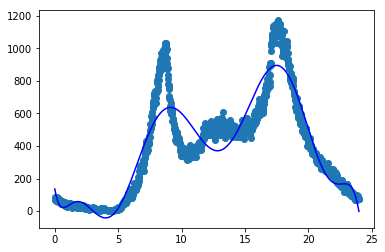

In [19]:
## Model 3
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)
x_10 = poly.fit_transform(x.reshape(-1,1))
linear = linear_model.LinearRegression()
linear.fit(x_10, y)
(linear.coef_, linear.intercept_)
plt.scatter(x,y)
plt.plot(x, np.dot(x_10, linear.coef_) + linear.intercept_, c='b')

## 2. Choose one of the polynomial models and create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values


D:\Python\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.114926e-41
  overwrite_a=True).T


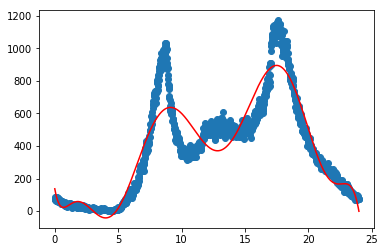

In [20]:
## From Question 1, used "Model 3"

ridge = linear_model.Ridge(alpha = 0.000000000005)

ridge.fit(x_10, y)

ridge.coef_, ridge.intercept_

plt.scatter(x,y)

plt.plot(x, np.dot(x_10, ridge.coef_) + ridge.intercept_, c='r')


D:\Python\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.229853e-26
  overwrite_a=True).T


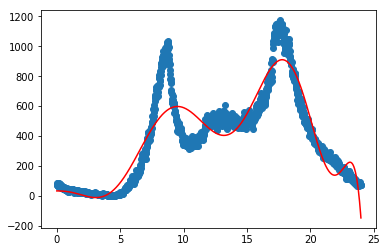

In [21]:
ridge = linear_model.Ridge(alpha = 10000)

ridge.fit(x_10, y)

ridge.coef_, ridge.intercept_

plt.scatter(x,y)

plt.plot(x, np.dot(x_10, ridge.coef_) + ridge.intercept_, c='r')

D:\Python\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.492182e-22
  overwrite_a=True).T


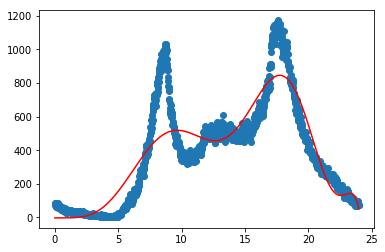

In [22]:
ridge = linear_model.Ridge(alpha = 100000000)

ridge.fit(x_10, y)

ridge.coef_, ridge.intercept_

plt.scatter(x,y)

plt.plot(x, np.dot(x_10, ridge.coef_) + ridge.intercept_, c='r')